In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import warnings
import os
import re
from jqi_functions import *
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

In [253]:
data = pd.read_csv('high_wage_outputs.csv')

In [254]:
county_info = pd.read_csv('data/county_to_regions_key - Sheet1.csv')

In [255]:
data = pd.merge(data, county_info, on='County')
data = data[['Industry', 'Date', 'County', 'CDI Regions', 'Rural/Urban', 'Population', 'High Wage Count']]

In [256]:
data.describe()

,High Wage Count
count,53064.000000
mean,5158.914085
std,5989.543820
min,0.000000
25%,1024.000000
50%,3253.000000
75%,6804.000000
max,58659.000000


In [263]:
data['Population'] = normalize_titles(data['Population']).astype(int)

In [264]:
data['hw_to_pop_perc'] = (data['High Wage Count'] / data['Population']) * 100

In [265]:
data.head()

,Industry,Date,County,CDI Regions,Rural/Urban,Population,High Wage Count,hw_to_pop_perc
0,accounting tax preparation bookkeeping and pay...,2019-01-01,Alameda,Bay Area,Urban,1656754,11611,0.700828
1,accounting tax preparation bookkeeping and pay...,2019-02-01,Alameda,Bay Area,Urban,1656754,12800,0.772595
2,accounting tax preparation bookkeeping and pay...,2019-03-01,Alameda,Bay Area,Urban,1656754,13016,0.785633
3,accounting tax preparation bookkeeping and pay...,2019-04-01,Alameda,Bay Area,Urban,1656754,12854,0.775854
4,accounting tax preparation bookkeeping and pay...,2019-05-01,Alameda,Bay Area,Urban,1656754,11638,0.702458


### High wage count in CA over 2019

In [56]:
hw_state = data.groupby(by=["Date"]).sum()
hw_state

,High Wage Count
Date,
2019-01-01,22394368
2019-02-01,22566368
2019-03-01,22514088
2019-04-01,22645894
2019-05-01,22649831
2019-06-01,22695955
2019-07-01,22736316
2019-08-01,22785652
2019-09-01,22849177


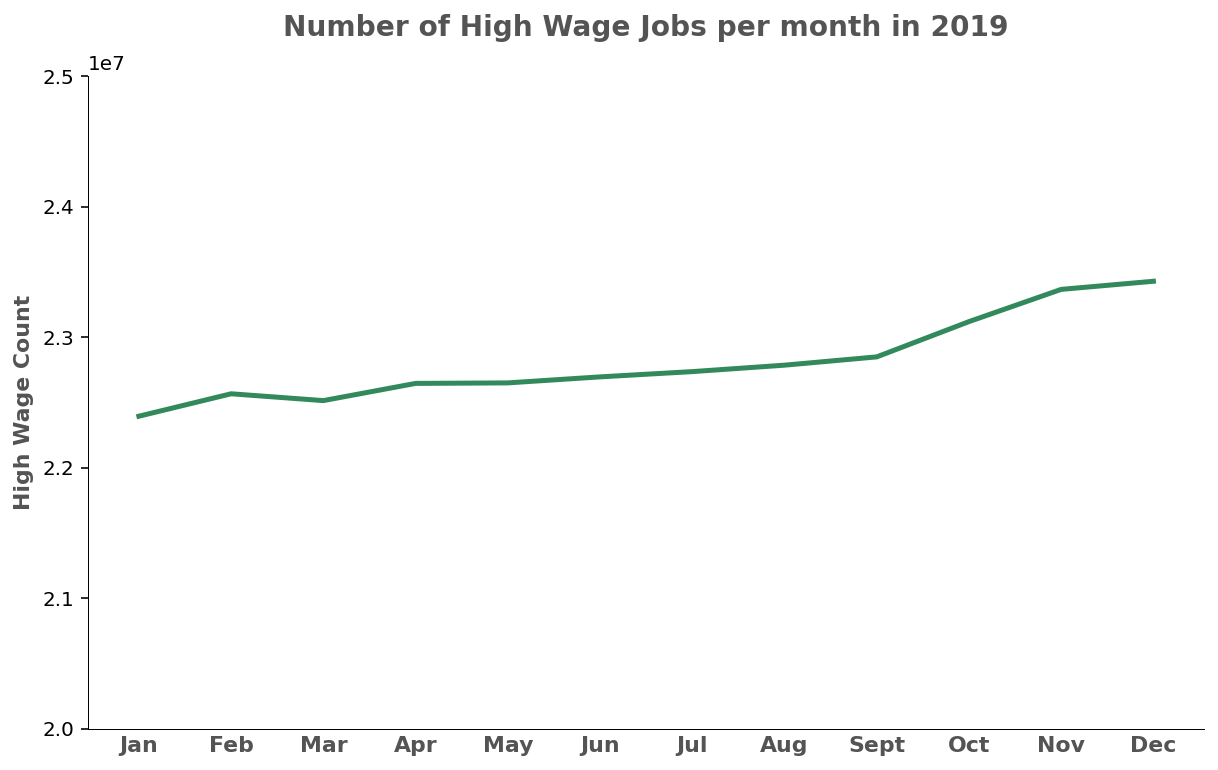

In [86]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_state['High Wage Count'].values, lw=2.5, color='#328a5c')

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title('Number of High Wage Jobs per month in 2019', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 12, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('High Wage Count', fontsize=11, weight='bold', color='#545454')

ax.set_ylim(2e+7,2.5e+7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

### Industries with most and least high wage jobs in the state

In [237]:
hw_state_industry = data.groupby(by=["Industry"]).mean().sort_values(by='High Wage Count')
hw_state_industry_cut = hw_state_industry.iloc[[0, 1, 2, 3, 4, -5, -4, -3, -2, -1]]
hw_state_industry_cut

,High Wage Count
Industry,
book stores and news dealers,1.613333
crop production,49.289216
department stores,78.637255
fabric mills except knitting mills,319.194444
other motor vehicle dealers,321.293210
legal services,19775.406863
individual and family services,20769.311275
offices of physicians,21372.382353
computer systems design and related services,22509.264706


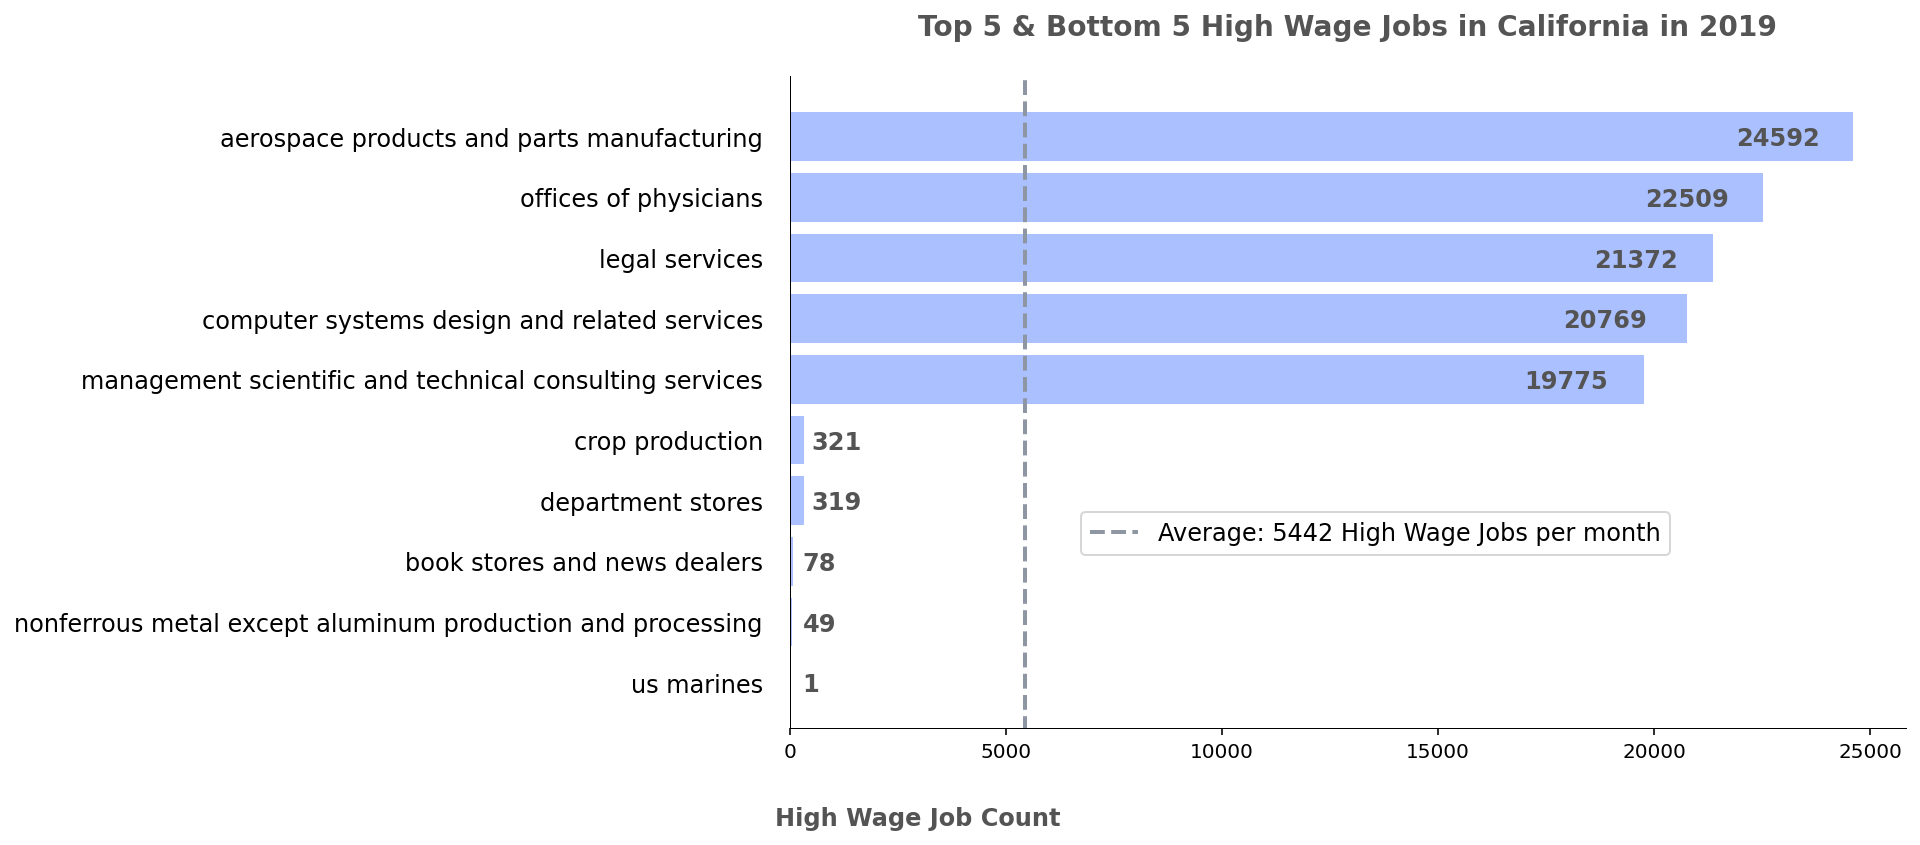

In [250]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(10), hw_state_industry_cut['High Wage Count'].values, color='#abc0ff')

ax.set_yticks(np.arange(10))
ax.set_yticklabels(hw_la_cut.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("High Wage Job Count", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

ax.vlines(x=hw_state_industry['High Wage Count'].values.mean(), ymin=-0.8, ymax=10, 
          color='#8e95a3', lw=2, ls='dashed', label='Average: 5442 High Wage Jobs per month')
ax.set_ylim(-0.75, 10)

ax.set_title('Top 5 & Bottom 5 High Wage Jobs in California in 2019', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.annotate("1", (300, -0.15), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("49", (300, 0.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("78", (300, 1.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("319", (500, 2.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("321", (500, 3.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("19775", (17000, 4.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("20769", (17900, 5.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("21372", (18600, 6.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("22509", (19800, 7.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("24592", (21900, 8.85), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.25, 0.35), loc='upper left', fontsize=12)
plt.show()

### Average high wage count in 2019 per region

In [94]:
hw_regions = data.groupby(by=["CDI Regions"]).mean().sort_values(by='High Wage Count')
hw_regions

,High Wage Count
CDI Regions,
Los Angeles,3496.092778
Central Coast,4502.556586
Orange,4630.766667
Bay Area,4668.046815
Inland Empire,4708.424749
San Diego-Imperial,4932.277992
Central Valley,5341.715746
Redwood Coast,6088.520649
Shasta / Cascades,6659.651248


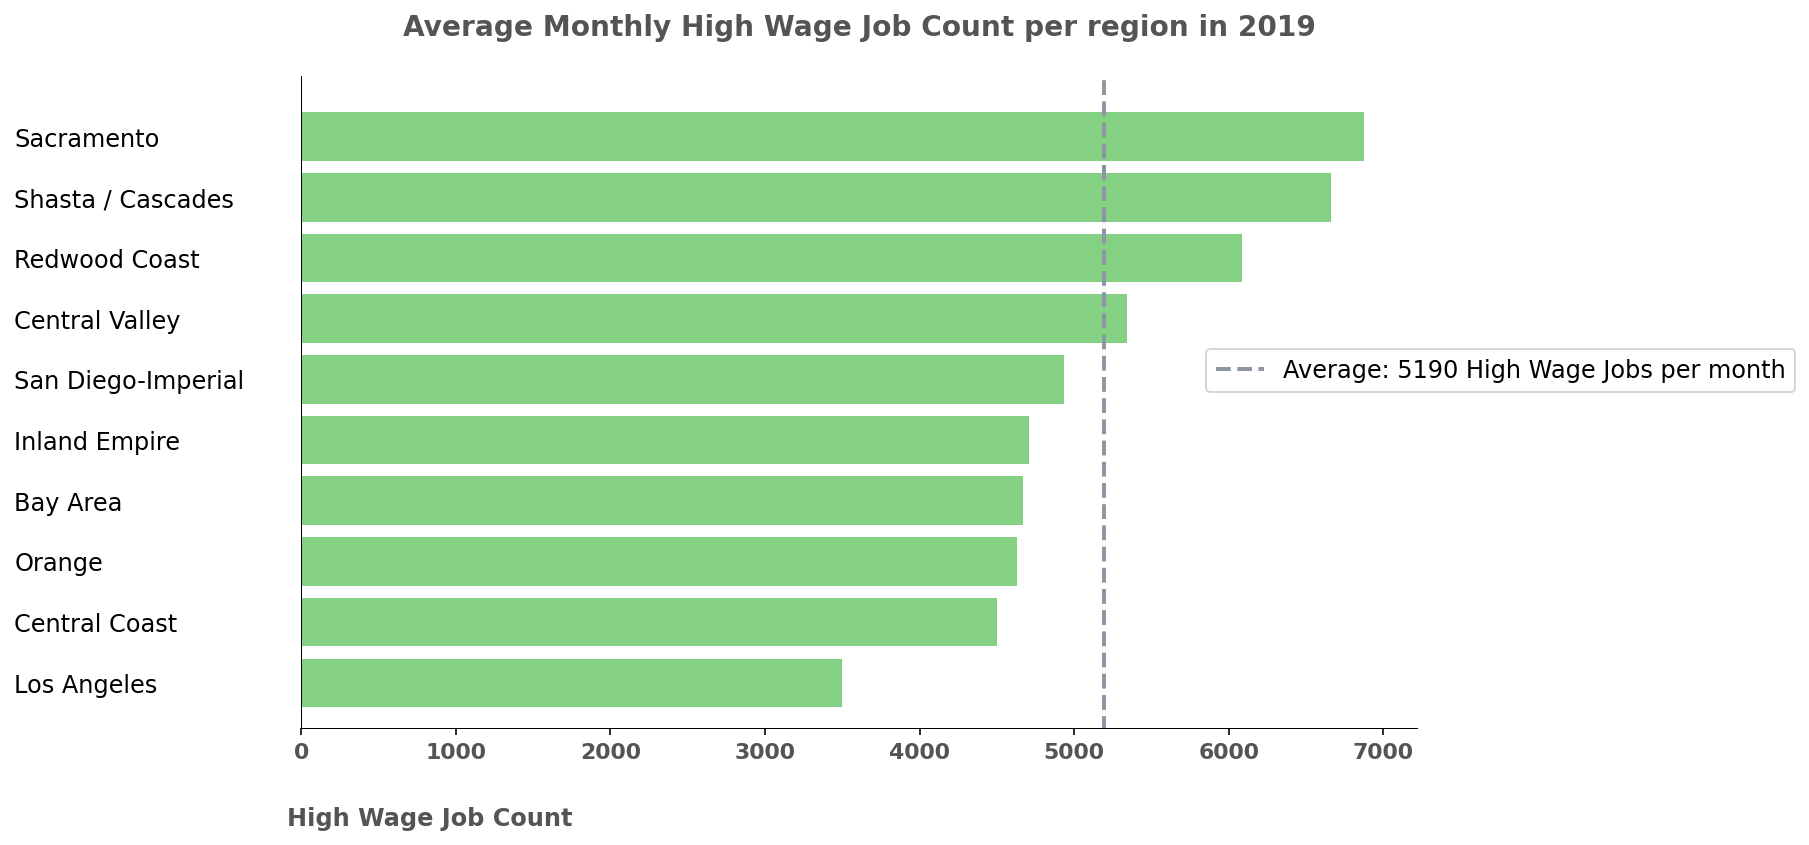

In [95]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(10), hw_regions['High Wage Count'].values, color='#85d184')

ax.set_yticks(np.arange(10))
ax.set_yticklabels(hw_regions.index, fontsize = 12, ha='left')
ax.tick_params(axis='y',direction='out', pad=140, left=False)

ax.set_xlabel("High Wage Job Count", fontsize=12, weight='bold', color = '#545454')
ax.set_xticklabels(['0', '1000','2000','3000','4000','5000','6000','7000'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

ax.vlines(x=hw_regions['High Wage Count'].values.mean(), ymin=-0.8, ymax=10, 
          color='#8e95a3', lw=2, ls='dashed', label='Average: 5190 High Wage Jobs per month')
ax.set_ylim(-0.75, 10)

ax.set_title('Average Monthly High Wage Job Count per region in 2019', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.8, 0.6), loc='upper left', fontsize=12)
plt.show()

In [124]:
# interested to see highs and lows of sacramento and los angeles
la_data = data.loc[data['CDI Regions'] == 'Los Angeles']
sac_data = data.loc[data['CDI Regions'] == 'Sacramento']

In [139]:
hw_la = la_data.groupby(by=["Industry"]).mean().sort_values(by='High Wage Count')
# look at top 5 and bottom 5 industries
hw_la_cut = hw_la.iloc[[0, 1, 2, 3, 4, -5, -4, -3, -2, -1]]

In [140]:
hw_sac = sac_data.groupby(by=["Industry"]).mean().sort_values(by='High Wage Count')
# look at top 5 and bottom 5 industries
hw_sac_cut = hw_sac.iloc[[0, 1, 2, 3, 4, -5, -4, -3, -2, -1]]

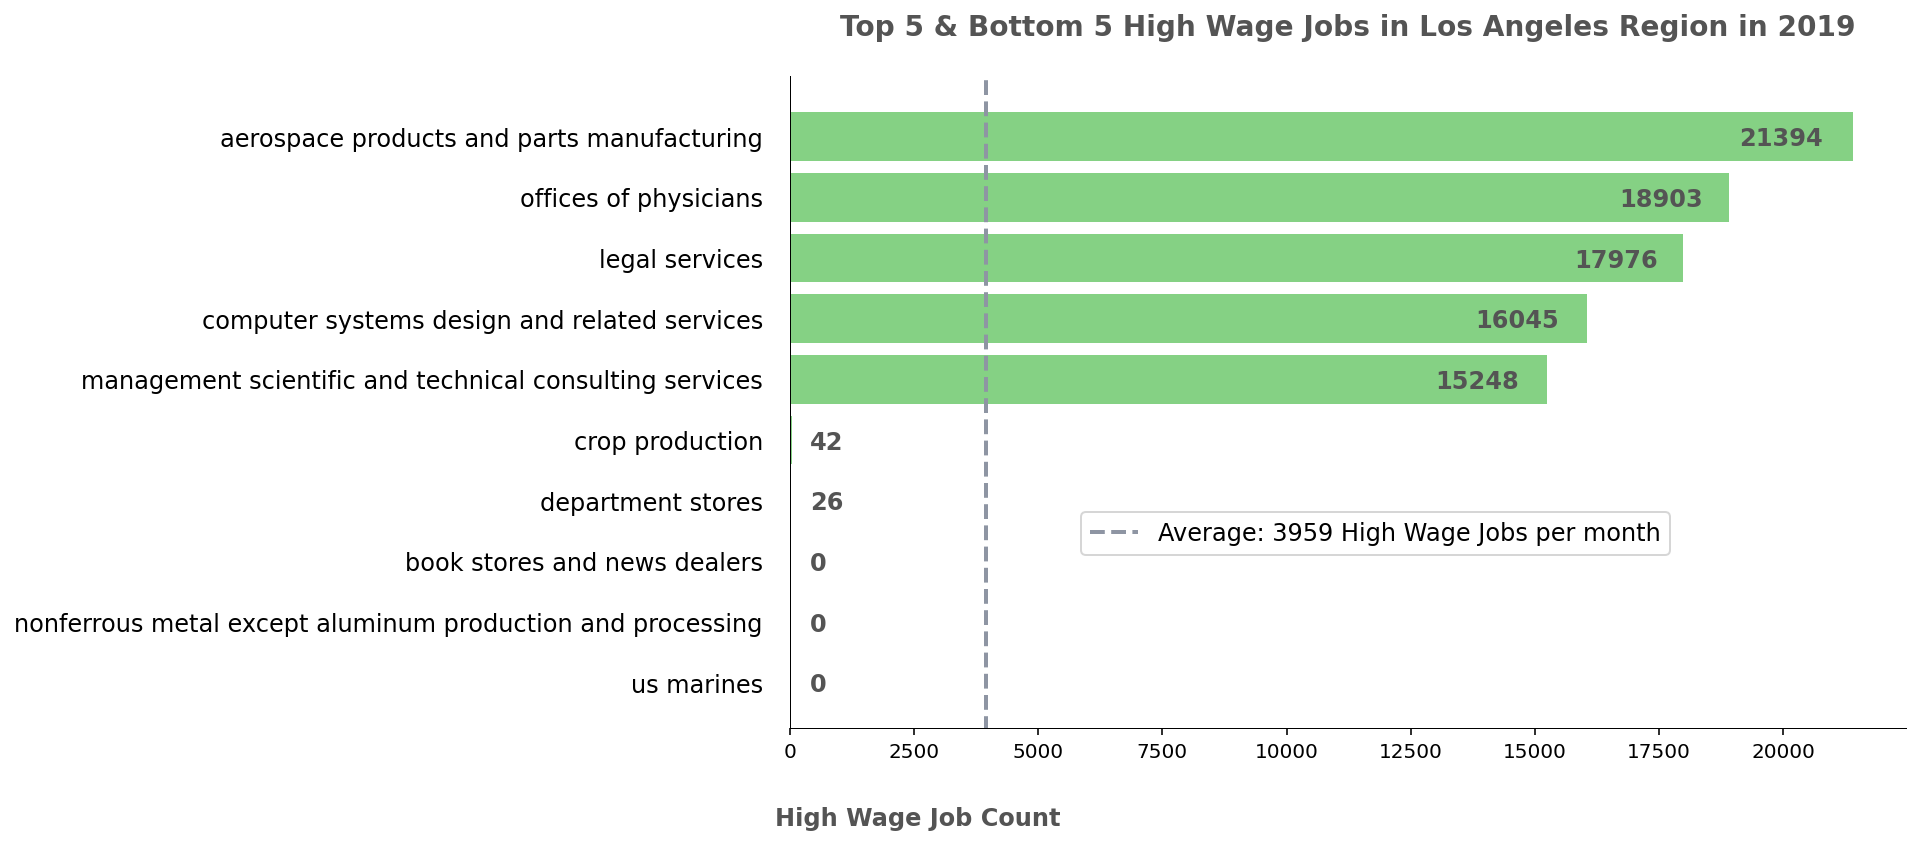

In [190]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(10), hw_la_cut['High Wage Count'].values, color='#85d184')

ax.set_yticks(np.arange(10))
ax.set_yticklabels(hw_la_cut.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("High Wage Job Count", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

ax.vlines(x=hw_la['High Wage Count'].values.mean(), ymin=-0.8, ymax=10, 
          color='#8e95a3', lw=2, ls='dashed', label='Average: 3959 High Wage Jobs per month')
ax.set_ylim(-0.75, 10)

ax.set_title('Top 5 & Bottom 5 High Wage Jobs in Los Angeles Region in 2019', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.annotate("0", (400, -0.15), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("0", (400, 0.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("0", (400, 1.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("26", (400, 2.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("42", (400, 3.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("15248", (13000, 4.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("16045", (13800, 5.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("17976", (15800, 6.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("18903", (16700, 7.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("21394", (19100, 8.85), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.25, 0.35), loc='upper left', fontsize=12)
plt.show()

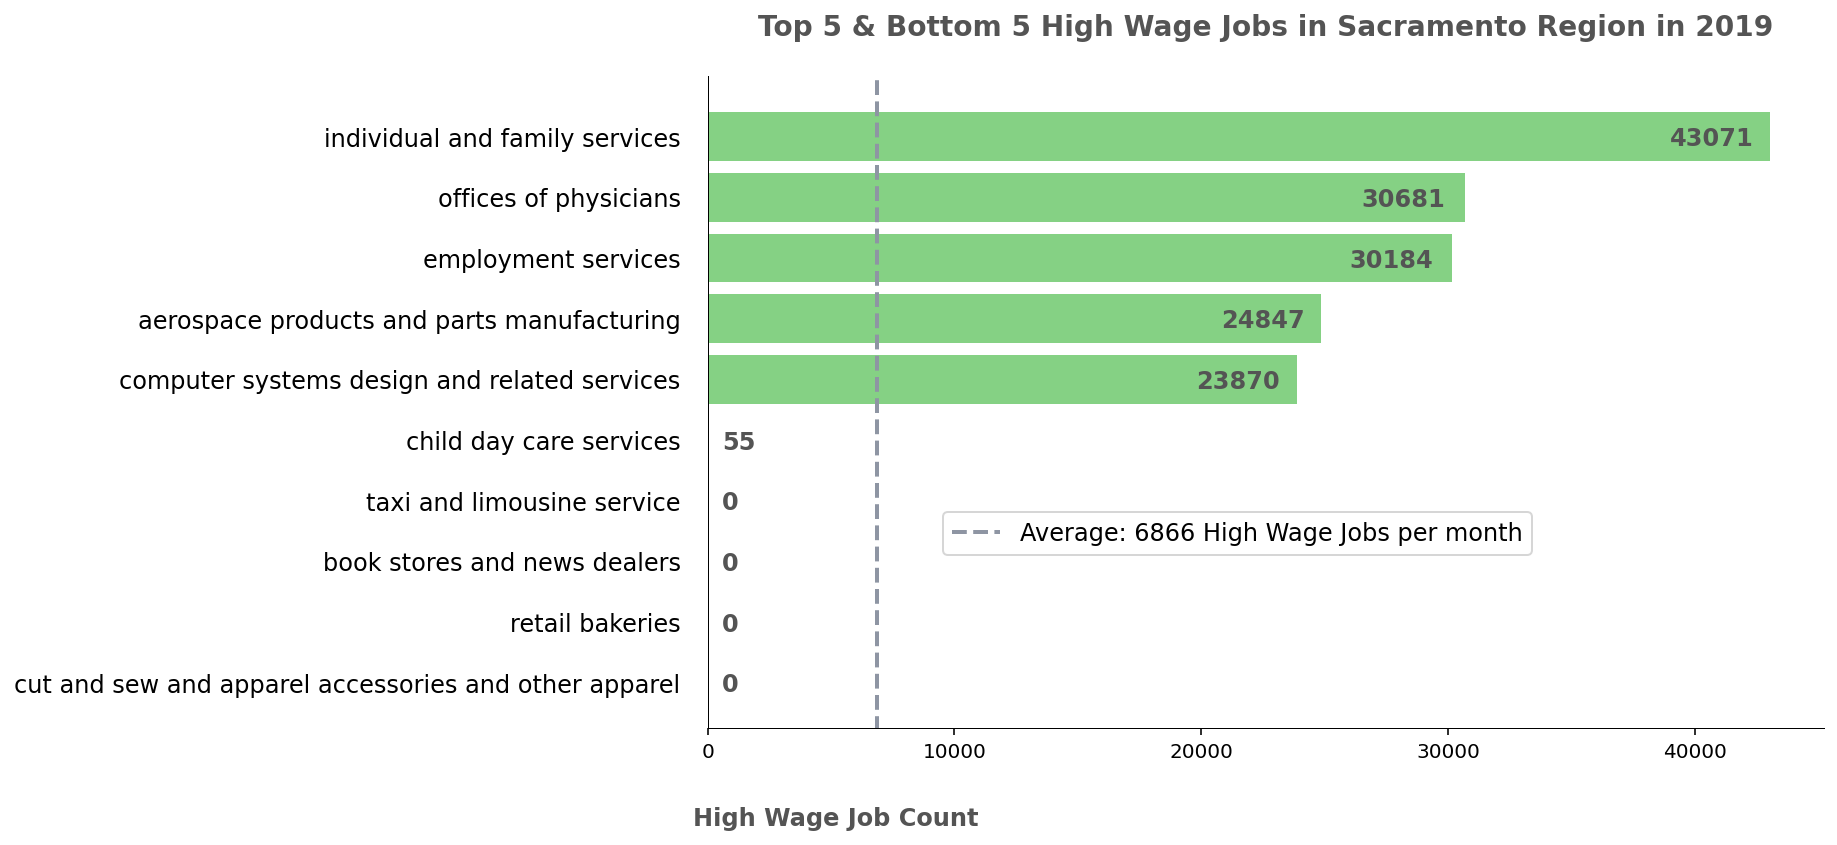

In [203]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(10), hw_sac_cut['High Wage Count'].values, color='#85d184')

ax.set_yticks(np.arange(10))
ax.set_yticklabels(hw_sac_cut.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("High Wage Job Count", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

ax.vlines(x=hw_sac['High Wage Count'].values.mean(), ymin=-0.8, ymax=10, 
          color='#8e95a3', lw=2, ls='dashed', label='Average: 6866 High Wage Jobs per month')
ax.set_ylim(-0.75, 10)

ax.set_title('Top 5 & Bottom 5 High Wage Jobs in Sacramento Region in 2019', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.annotate("0", (600, -0.15), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("0", (600, 0.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("0", (600, 1.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("0", (600, 2.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("55", (600, 3.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("23870", (19800, 4.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("24847", (20800, 5.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("30184", (26000, 6.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("30681", (26500, 7.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("43071", (39000, 8.85), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.2, 0.35), loc='upper left', fontsize=12)
plt.show()

In [205]:
shasta_data = data.loc[data['CDI Regions'] == 'Shasta / Cascades']
cv_data = data.loc[data['CDI Regions'] == 'Central Valley']
rc_data = data.loc[data['CDI Regions'] == 'Redwood Coast']
sd_data = data.loc[data['CDI Regions'] == 'San Diego-Imperial']
orange_data = data.loc[data['CDI Regions'] == 'Orange']
ie_data = data.loc[data['CDI Regions'] == 'Inland Empire']
cc_data = data.loc[data['CDI Regions'] == 'Central Coast']
bay_data = data.loc[data['CDI Regions'] == 'Bay Area']

In [224]:
hw_shasta = shasta_data.groupby(by=["Date"]).sum()
hw_cv = cv_data.groupby(by=["Date"]).sum()
hw_rc = rc_data.groupby(by=["Date"]).sum()
hw_sd = sd_data.groupby(by=["Date"]).sum()
hw_orange = orange_data.groupby(by=["Date"]).sum()
hw_ie = ie_data.groupby(by=["Date"]).sum()
hw_cc = cc_data.groupby(by=["Date"]).sum()
hw_bay = bay_data.groupby(by=["Date"]).sum()
hw_sac = sac_data.groupby(by=["Date"]).sum()
hw_la = la_data.groupby(by=["Date"]).sum()

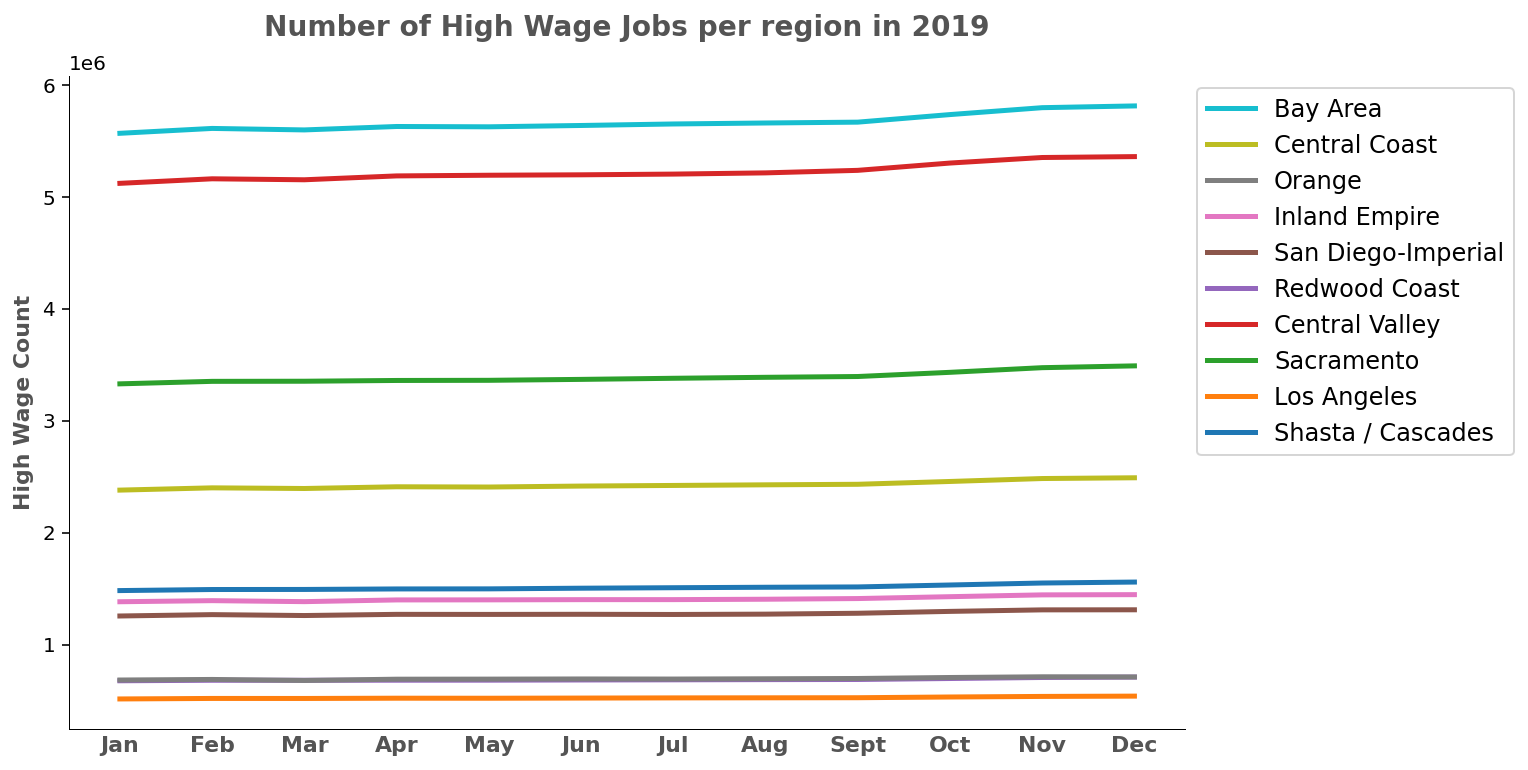

In [233]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_shasta['High Wage Count'].values, lw=2.5, label='Shasta / Cascades')
ax.plot(hw_la['High Wage Count'].values, lw=2.5, label='Los Angeles')
ax.plot(hw_sac['High Wage Count'].values, lw=2.5, label='Sacramento')
ax.plot(hw_cv['High Wage Count'].values, lw=2.5, label='Central Valley')
ax.plot(hw_rc['High Wage Count'].values, lw=2.5, label='Redwood Coast')
ax.plot(hw_sd['High Wage Count'].values, lw=2.5, label='San Diego-Imperial')
ax.plot(hw_ie['High Wage Count'].values, lw=2.5, label='Inland Empire')
ax.plot(hw_orange['High Wage Count'].values, lw=2.5, label='Orange')
ax.plot(hw_cc['High Wage Count'].values, lw=2.5, label='Central Coast')
ax.plot(hw_bay['High Wage Count'].values, lw=2.5, label='Bay Area')

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title('Number of High Wage Jobs per region in 2019', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 12, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('High Wage Count', fontsize=11, weight='bold', color='#545454')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

plt.show()

### Average high wage count between rural and urban locations

In [93]:
hw_rural_urban = data.groupby(by=["Rural/Urban"]).mean().sort_values(by='High Wage Count')
hw_rural_urban

,High Wage Count
Rural/Urban,
Urban,4744.145329
Rural,5941.343396


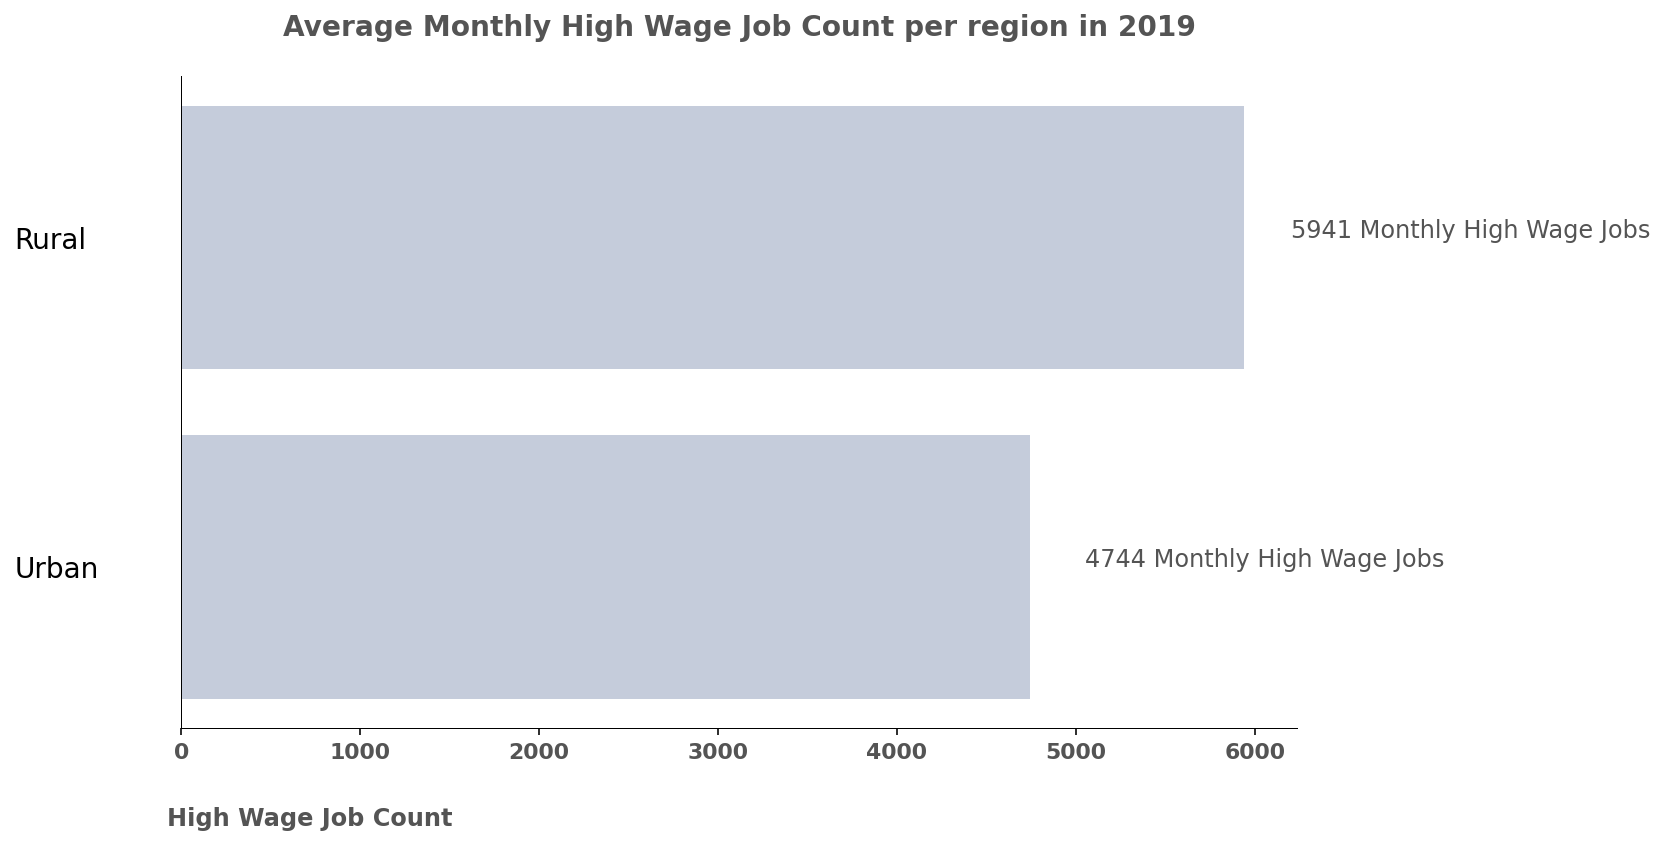

In [122]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(2), hw_rural_urban['High Wage Count'].values, color='#c5ccdb')

ax.set_yticks(np.arange(2))
ax.set_yticklabels(hw_rural_urban.index, fontsize = 14, ha='left')
ax.tick_params(axis='y',direction='out', pad=80, left=False)

ax.set_xlabel("High Wage Job Count", fontsize=12, weight='bold', color = '#545454')
ax.set_xticklabels(['0', '1000','2000','3000','4000','5000','6000'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

ax.annotate("5941 Monthly High Wage Jobs", (6200, 1), size=12, color='#545454', annotation_clip=False)
ax.annotate("4744 Monthly High Wage Jobs", (5050, 0), size=12, color='#545454', annotation_clip=False)

ax.set_title('Average Monthly High Wage Job Count per region in 2019', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

### Top 5 & Bottom 5 Counties by number of high wage jobs

In [267]:
hw_county = data.groupby(by=["County"]).mean().sort_values(by='High Wage Count')
hw_county_cut = hw_county.iloc[[0, 1, 2, 3, 4, -5, -4, -3, -2, -1]]

In [274]:
hw_county_cut

,Population,High Wage Count,hw_to_pop_perc
County,,,
Los Angeles,10081570.0,3496.092778,0.034678
San Francisco,874961.0,4051.017123,0.462994
Santa Clara,1927470.0,4137.352941,0.214652
Santa Barbara,444829.0,4148.739583,0.932659
San Diego,3316073.0,4150.802222,0.125172
Humboldt,135940.0,6088.520649,4.478829
Butte,225817.0,6436.230303,2.850197
Shasta,179212.0,6869.705128,3.833284
El Dorado,188563.0,7950.778261,4.216510


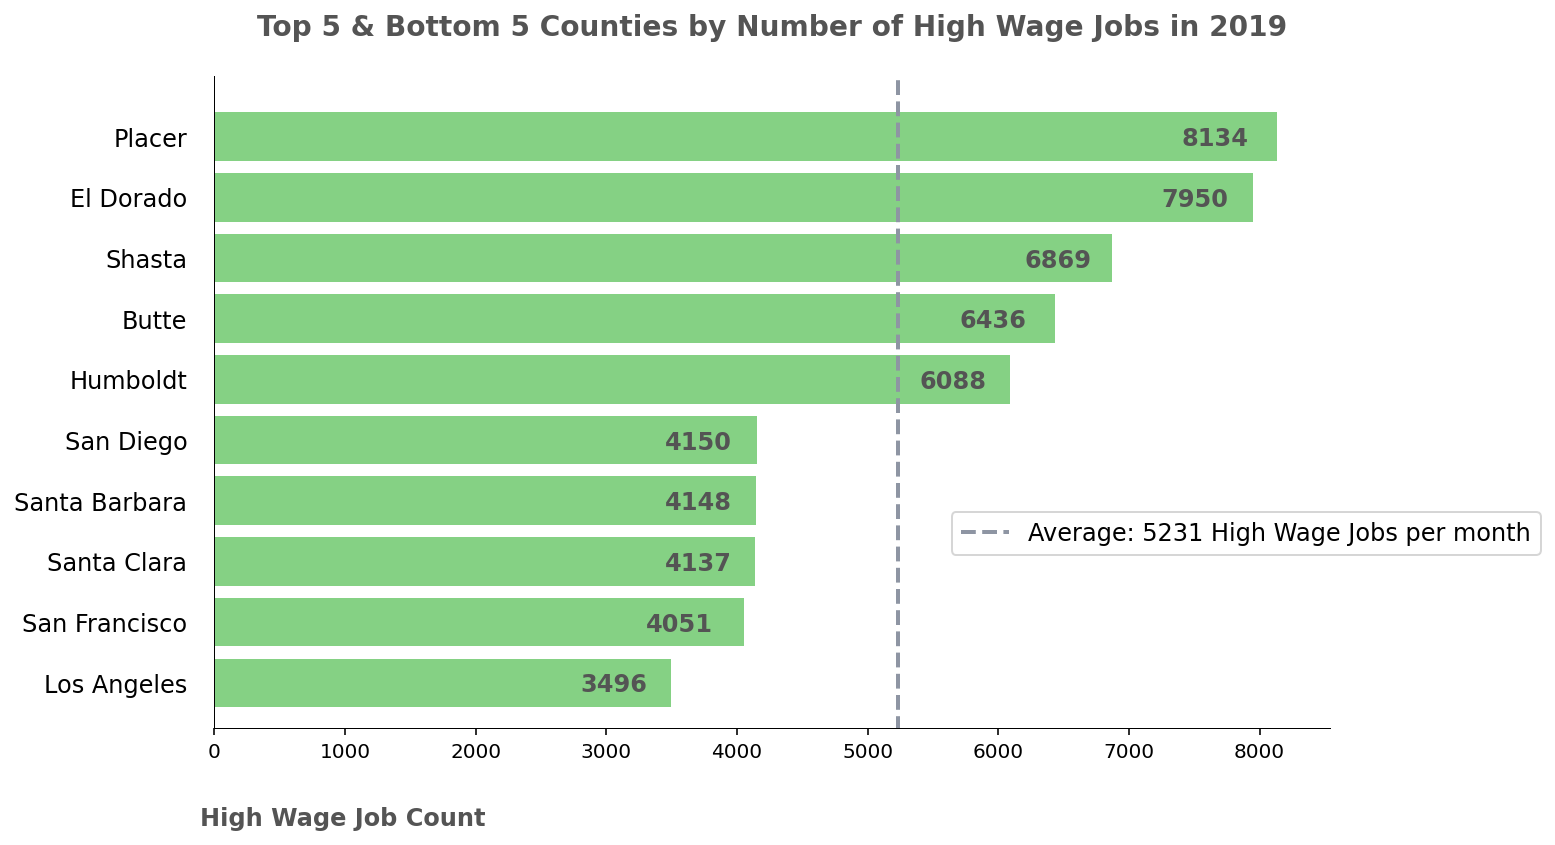

In [299]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(10), hw_county_cut['High Wage Count'].values, color='#85d184')

ax.set_yticks(np.arange(10))
ax.set_yticklabels(hw_county_cut.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("High Wage Job Count", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

ax.vlines(x=hw_county['High Wage Count'].values.mean(), ymin=-0.8, ymax=10, 
          color='#8e95a3', lw=2, ls='dashed', label='Average: 5231 High Wage Jobs per month')
ax.set_ylim(-0.75, 10)

ax.set_title('Top 5 & Bottom 5 Counties by Number of High Wage Jobs in 2019', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[0])}", (2800, -0.15), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[1])}", (3300, 0.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[2])}", (3450, 1.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[3])}", (3450, 2.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[4])}", (3450, 3.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[5])}", (5400, 4.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[6])}", (5700, 5.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[7])}", (6200, 6.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[8])}", (7250, 7.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[9])}", (7400, 8.85), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.65, 0.35), loc='upper left', fontsize=12)
plt.show()

In [300]:
hw_county = data.groupby(by=["County"]).mean().sort_values(by='hw_to_pop_perc')
hw_county_cut = hw_county.iloc[[0, 1, 2, 3, 4, -5, -4, -3, -2, -1]]
hw_county_cut

,Population,High Wage Count,hw_to_pop_perc
County,,,
Los Angeles,10081570.0,3496.092778,0.034678
San Diego,3316073.0,4150.802222,0.125172
Orange,3168044.0,4630.766667,0.146171
Riverside,2411439.0,4968.080000,0.206021
San Bernardino,2149031.0,4447.026846,0.206932
Napa,139623.0,4983.345652,3.569144
Shasta,179212.0,6869.705128,3.833284
Kings,150691.0,5951.587963,3.949531
El Dorado,188563.0,7950.778261,4.216510


In [301]:
hw_county['hw_to_pop_perc'].values.mean()

1.5406187786068126

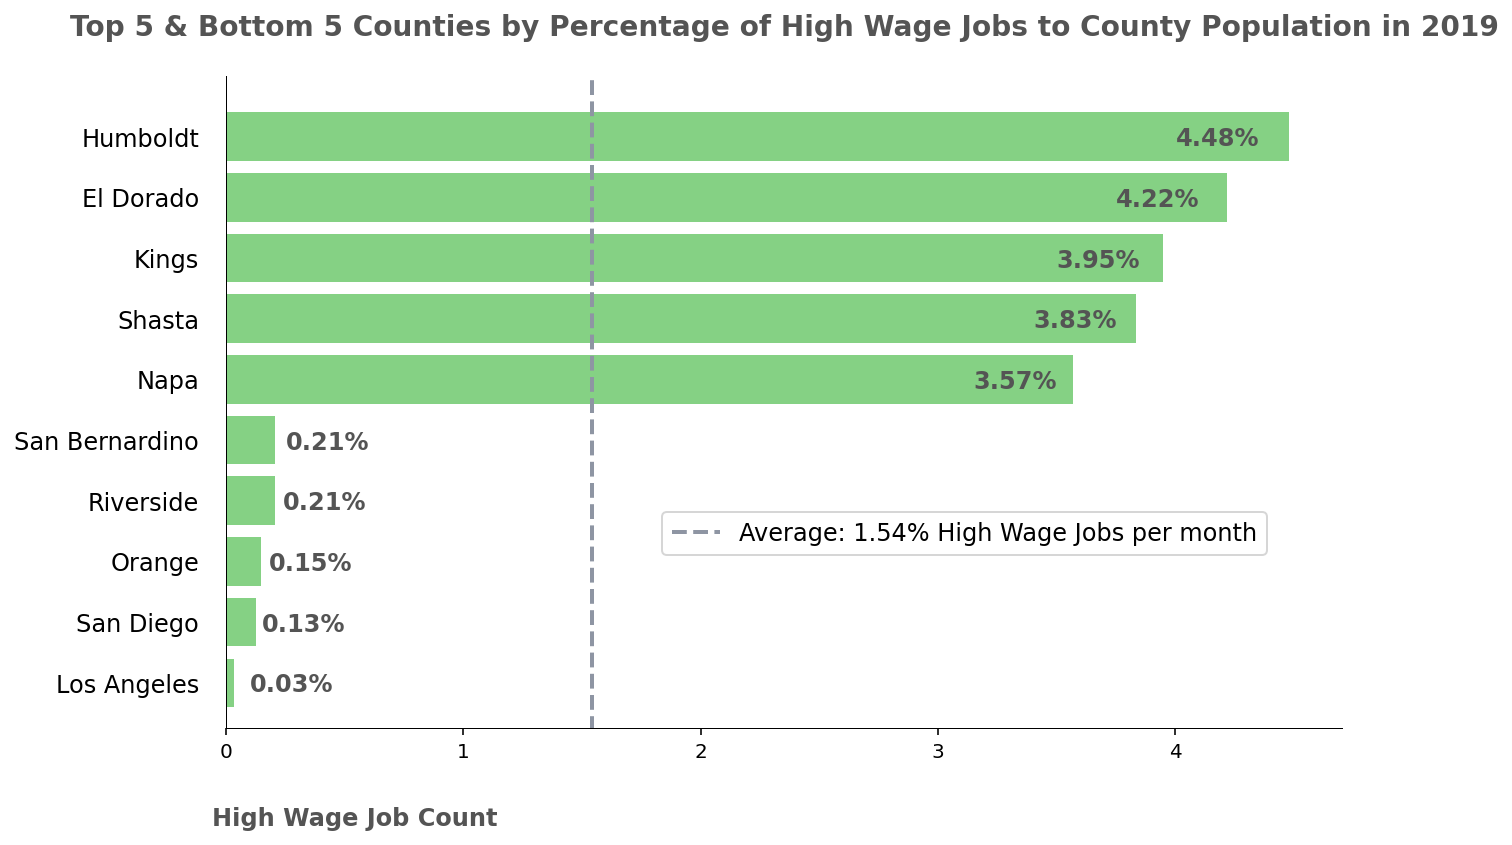

In [323]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(10), hw_county_cut['hw_to_pop_perc'].values, color='#85d184')

ax.set_yticks(np.arange(10))
ax.set_yticklabels(hw_county_cut.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("High Wage Job Count", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

ax.vlines(x=hw_county['hw_to_pop_perc'].values.mean(), ymin=-0.8, ymax=10, 
          color='#8e95a3', lw=2, ls='dashed', label='Average: 1.54% High Wage Jobs per month')
ax.set_ylim(-0.75, 10)

ax.set_title('Top 5 & Bottom 5 Counties by Percentage of High Wage Jobs to County Population in 2019', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.annotate(f"{round(hw_county_cut['hw_to_pop_perc'].values[0], 2)}%", (0.1, -0.15), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_county_cut['hw_to_pop_perc'].values[1], 2)}%", (0.15, 0.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_county_cut['hw_to_pop_perc'].values[2], 2)}%", (0.18, 1.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_county_cut['hw_to_pop_perc'].values[3], 2)}%", (0.24, 2.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_county_cut['hw_to_pop_perc'].values[4], 2)}%", (0.25, 3.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_county_cut['hw_to_pop_perc'].values[5], 2)}%", (3.15, 4.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_county_cut['hw_to_pop_perc'].values[6], 2)}%", (3.4, 5.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_county_cut['hw_to_pop_perc'].values[7], 2)}%", (3.5, 6.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_county_cut['hw_to_pop_perc'].values[8], 2)}%", (3.75, 7.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_county_cut['hw_to_pop_perc'].values[9], 2)}%", (4, 8.85), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.38, 0.35), loc='upper left', fontsize=12)
plt.show()

### Largest discrepancies in wage counts

In [ ]:
# things happening year to year, month to month

# for presentation:
# explain substitution metric in powerpoint
# brief summary of edd hierarchy